In [37]:
%config IPCompleter.greedy=True

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.decomposition import PCA

In [39]:
creditcard_df = pd.read_csv("CC GENERAL.csv")

In [40]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [41]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [42]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


<AxesSubplot:>

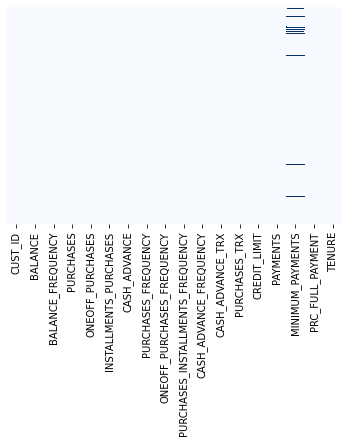

In [43]:
# check for missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [44]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [45]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [46]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

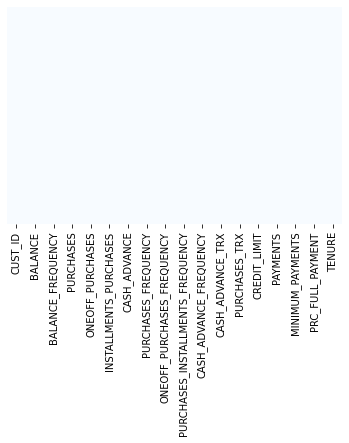

In [47]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [48]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [49]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [50]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

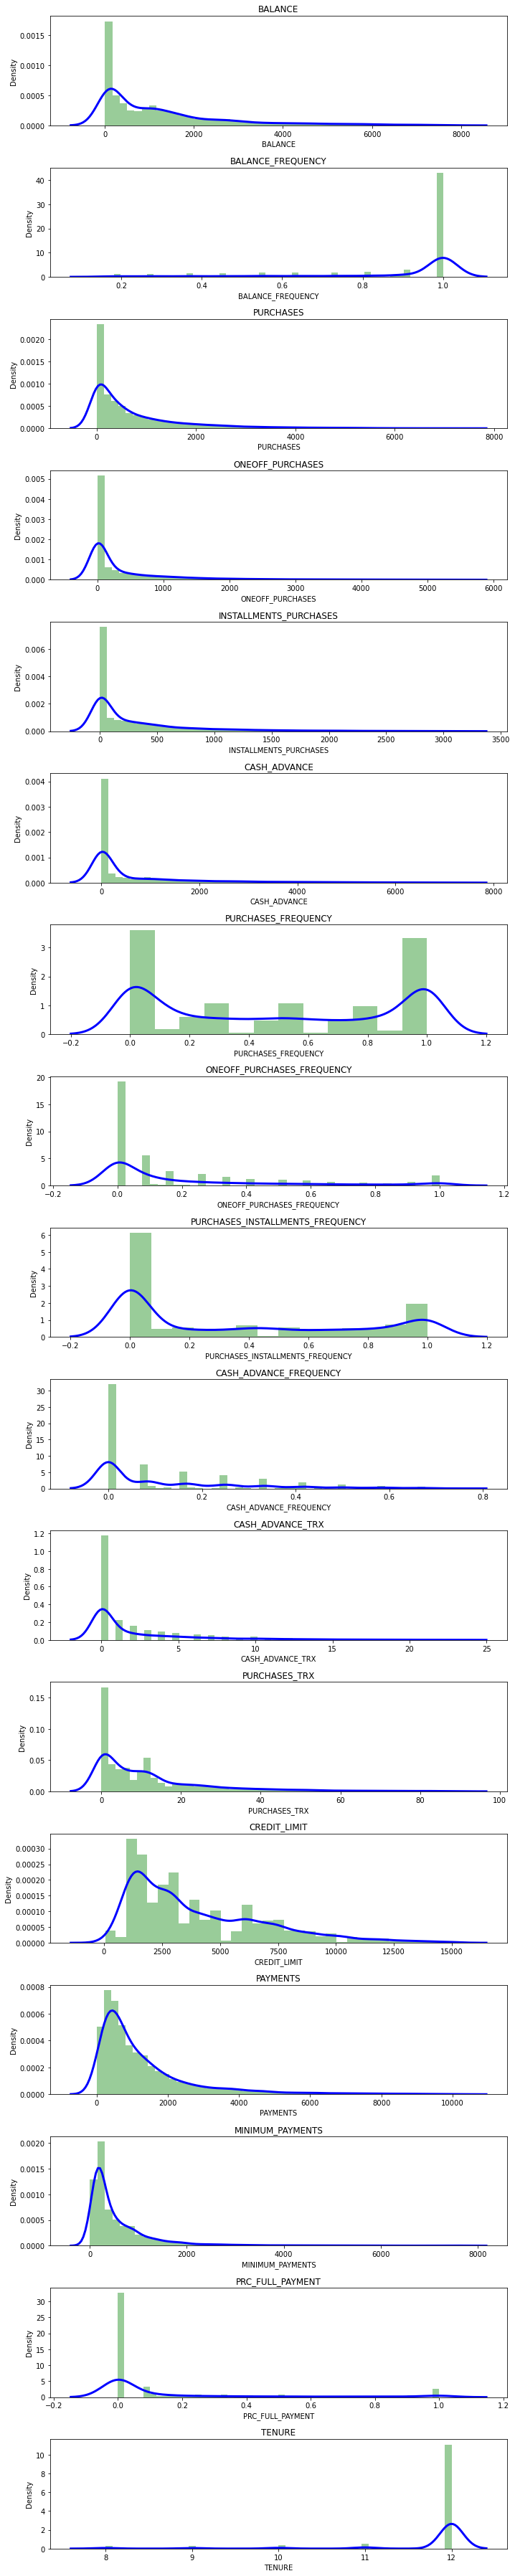

In [55]:
# Univariate analysis

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df1.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df1[creditcard_df1.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df1.columns[i])

plt.tight_layout()


<AxesSubplot:>

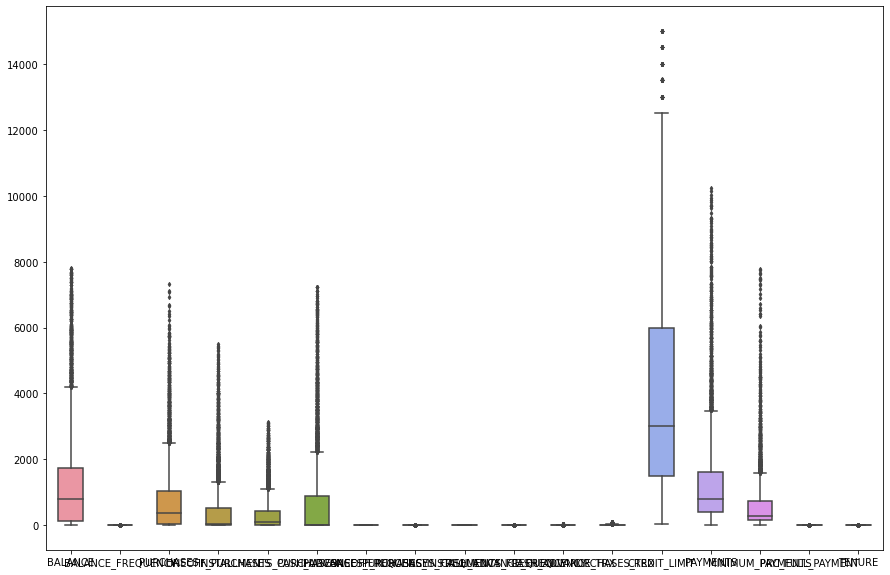

In [54]:
# Check for outliers
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = creditcard_df1,width=0.5,ax=ax,fliersize=3)

In [51]:
# Use z scores to remove outliers
z = np.abs(stats.zscore(creditcard_df))
creditcard_df1 = creditcard_df[(z < 3).all(axis=1)]

In [53]:
creditcard_df1.shape

(7434, 17)

In [56]:
correlations = creditcard_df1.corr()

<AxesSubplot:>

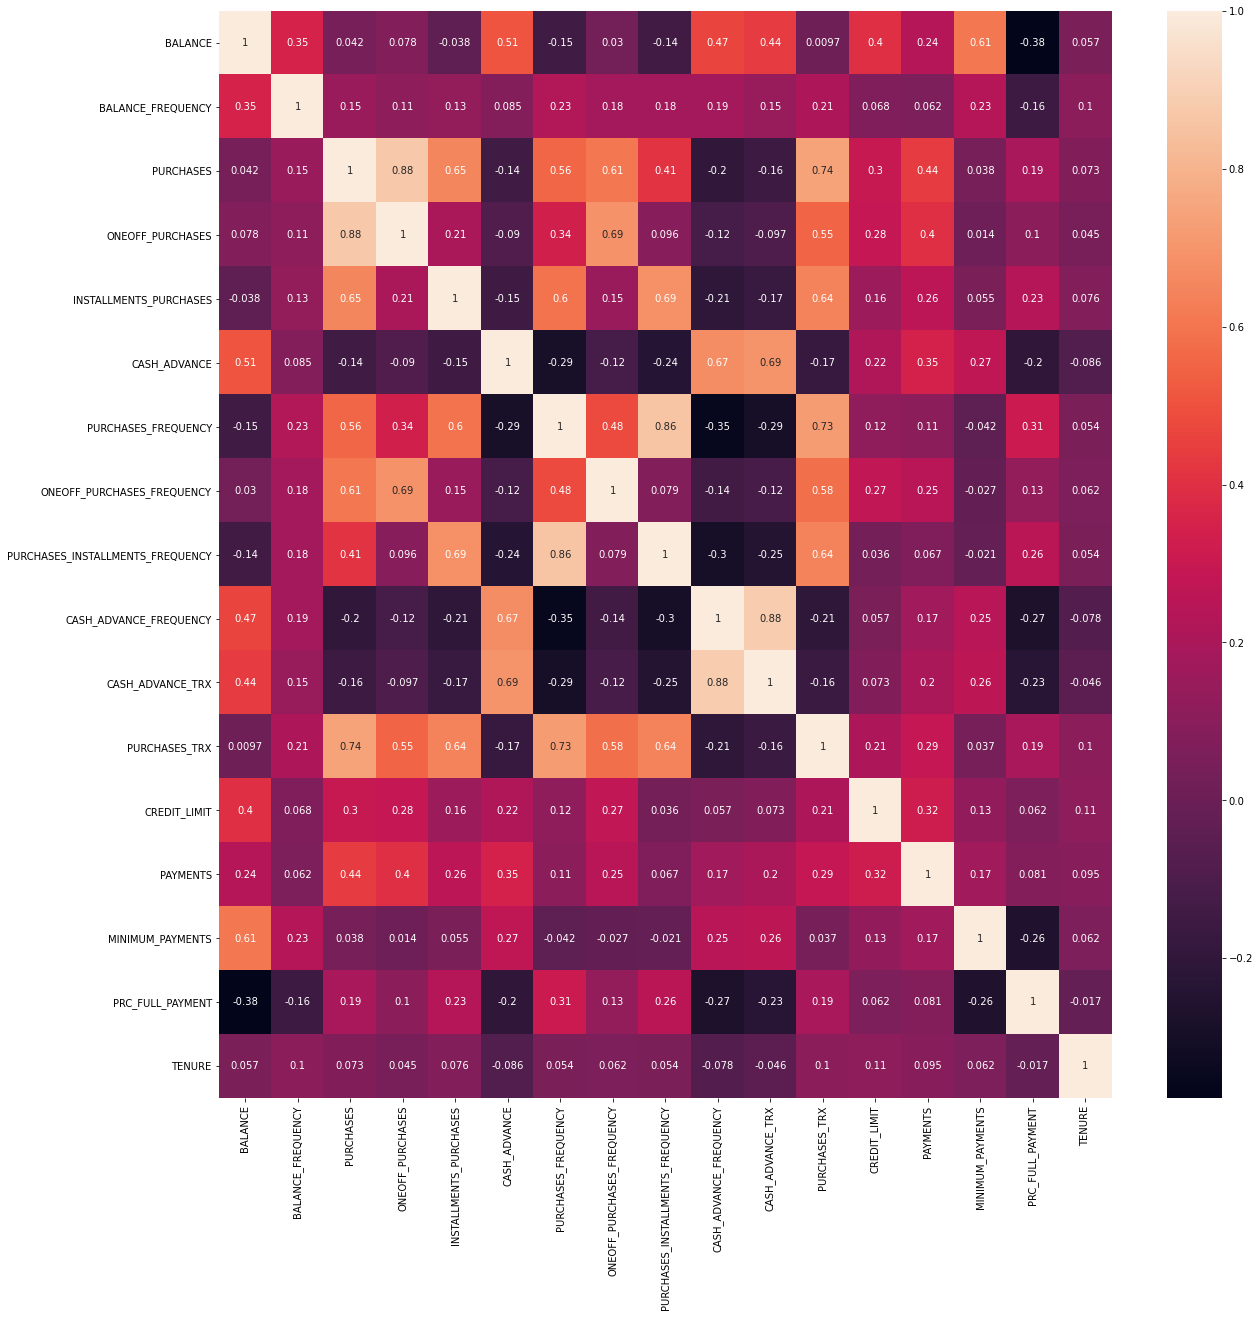

In [57]:
# Visualise correlations
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [58]:
# Let's scale the data before we begin modelling
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df1)

In [59]:
creditcard_df_scaled.view()

array([[-0.80965236, -0.33491067, -0.64144794, ..., -0.57780385,
        -0.53152321,  0.31218731],
       [ 1.27327162,  0.09112689, -0.73448727, ...,  0.6237473 ,
         0.2326373 ,  0.31218731],
       [ 0.80727139,  0.51716446,  0.01955068, ...,  0.05048463,
        -0.53152321,  0.31218731],
       ...,
       [-0.26386232, -0.65444001, -0.73448727, ..., -0.32215134,
        -0.53152321, -4.6976356 ],
       [-0.74584887,  0.51716446, -0.30439979, ..., -0.5969573 ,
        -0.53152321, -4.6976356 ],
       [-0.61848108, -0.65444001, -0.65529656, ..., -0.49336345,
        -0.53152321, -4.6976356 ]])

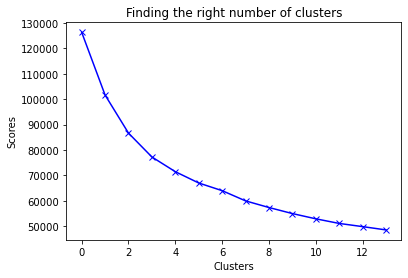

In [60]:
# Obtain optimal number of clusters
scores_1 = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()


In [69]:
# Build the KMeans model
kmeans = KMeans(5)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [70]:
kmeans.cluster_centers_.shape

(5, 17)

In [73]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.764129,-2.131970,-0.417578,-0.284322,-0.400344,-0.333393,-0.545546,-0.379353,-0.460004,-0.486989,-0.422474,-0.514602,-0.162885,-0.280987,-0.528939,0.379604,-0.127833
1,0.020710,0.400074,-0.480032,-0.269232,-0.550720,-0.184365,-0.718453,-0.213943,-0.727723,-0.002969,-0.116649,-0.563423,-0.323387,-0.338713,-0.002116,-0.460706,0.034446
2,-0.448164,0.294611,0.061124,-0.330269,0.642517,-0.446570,1.009439,-0.262092,1.155378,-0.516220,-0.462667,0.385987,-0.250541,-0.264340,-0.155229,0.431800,-0.009416
3,0.171220,0.374715,1.889084,1.846586,0.931893,-0.285611,1.043887,1.712635,0.607147,-0.341739,-0.306224,1.622620,0.808661,0.928564,0.014729,0.349777,0.182158
4,1.312713,0.330050,-0.419421,-0.295048,-0.387710,1.771918,-0.618199,-0.316469,-0.523150,1.695470,1.756772,-0.453718,0.543762,0.603505,0.773999,-0.431963,-0.106451


In [74]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,109.997655,0.434721,324.950350,205.663598,119.546979,260.133567,0.269533,0.083242,0.176897,0.032360,0.649621,4.277462,3521.414715,893.955615,177.446085,0.264961,11.648674
1,1301.265794,0.975015,260.911636,217.638293,43.459904,444.220045,0.201006,0.130814,0.071790,0.109206,1.854812,3.539331,3050.230126,811.037219,586.448318,0.020594,11.778243
2,589.585243,0.952511,815.798336,169.204843,647.211930,120.330555,0.885810,0.116966,0.811099,0.027719,0.491228,17.893674,3264.083552,917.866775,467.578232,0.280140,11.743222
3,1529.718250,0.969604,2690.139011,1896.556915,793.630088,319.155713,0.899462,0.684897,0.595862,0.055420,1.107738,36.590597,6373.586502,2631.357225,599.525708,0.256287,11.896180
4,3262.333826,0.960073,323.060193,197.152993,125.939171,2860.721433,0.240739,0.101328,0.152105,0.378863,9.237569,5.197974,5595.921926,2164.441870,1188.988893,0.028953,11.665746


In [75]:
labels.shape

(7434,)

In [76]:
labels.max()

4

In [77]:
labels.min()

0

In [80]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df1, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,4.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0


In [81]:
pd.crosstab(index=creditcard_df_cluster['cluster'],columns='count')

col_0,count
cluster,
0.0,1055
1.0,2390
2.0,1882
3.0,1019
4.0,1088


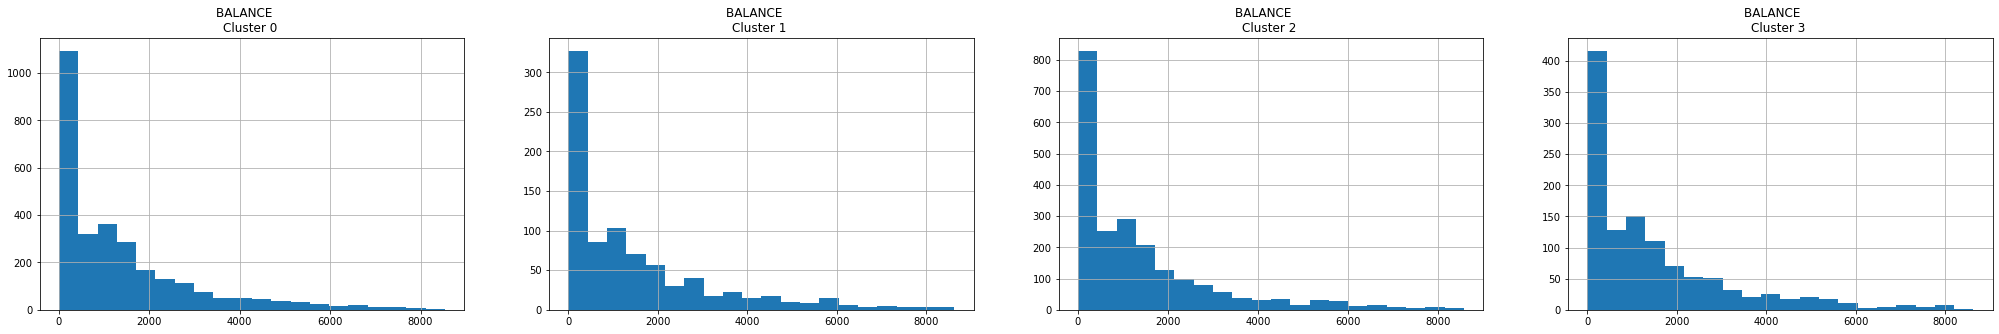

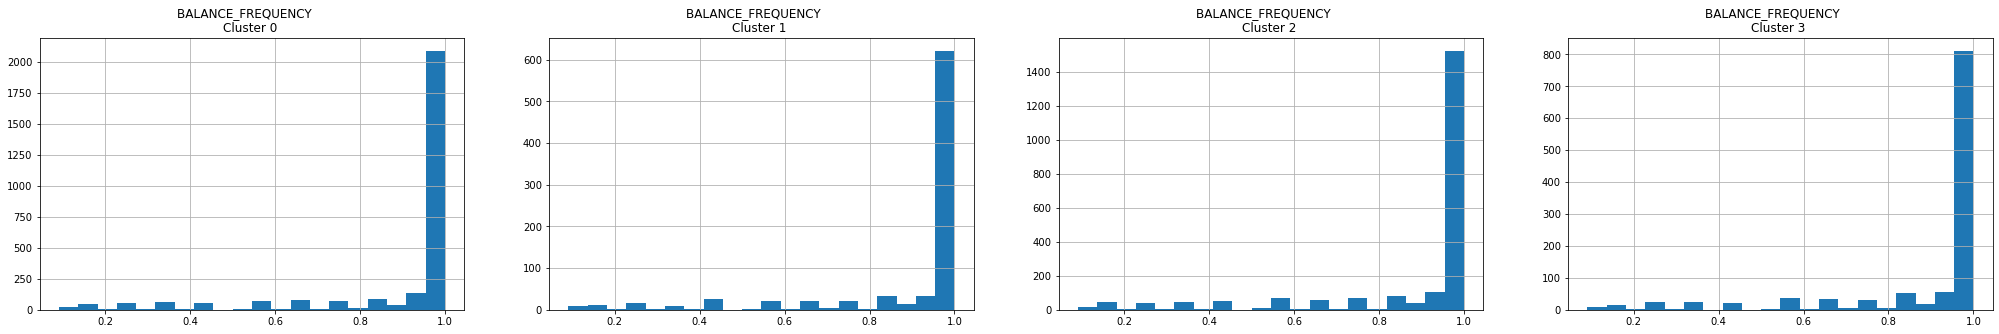

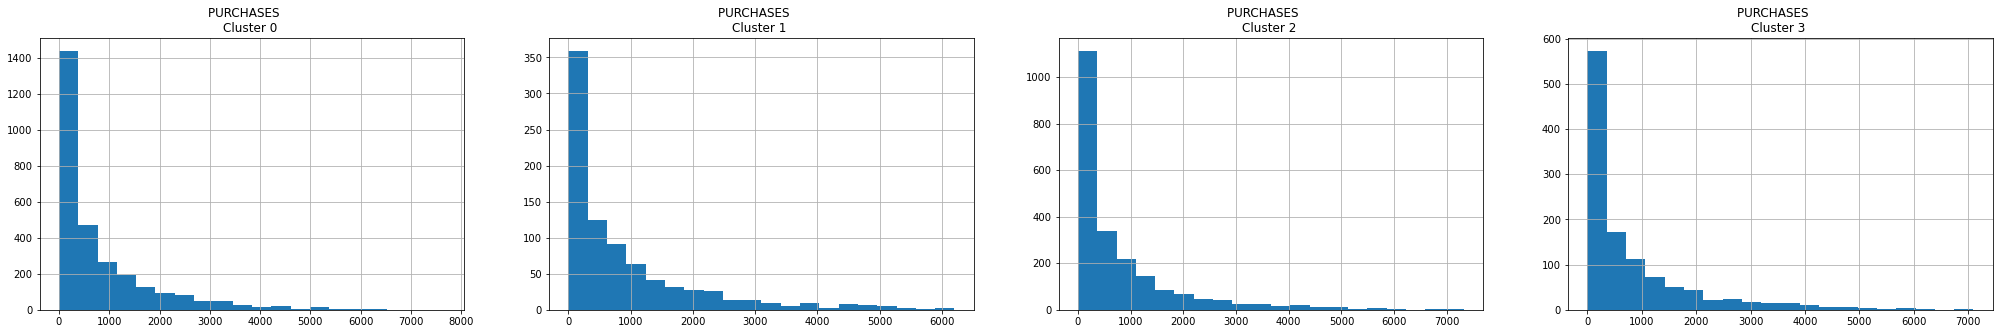

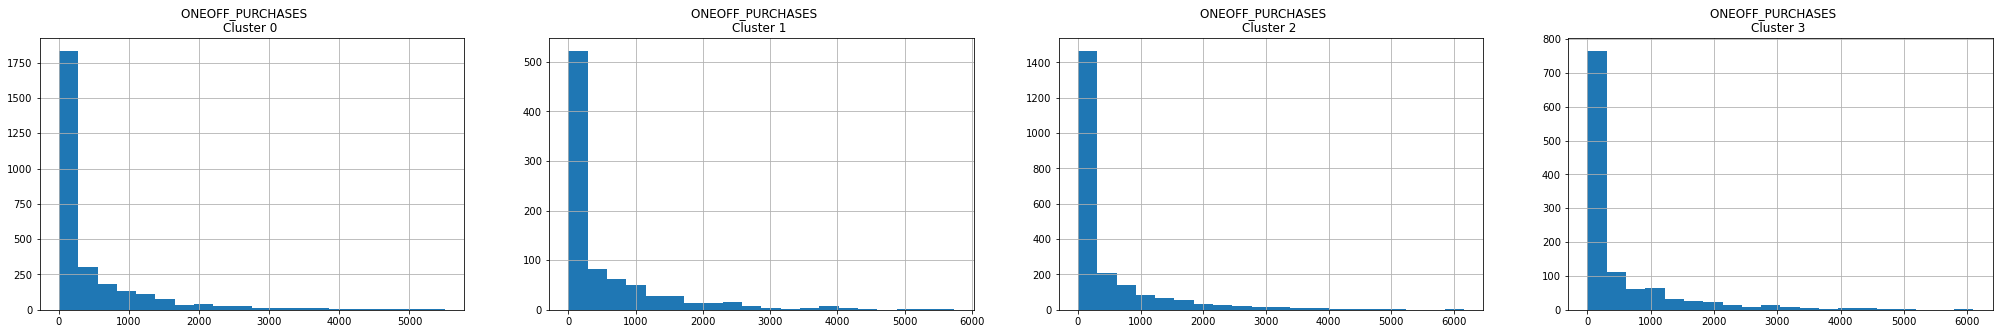

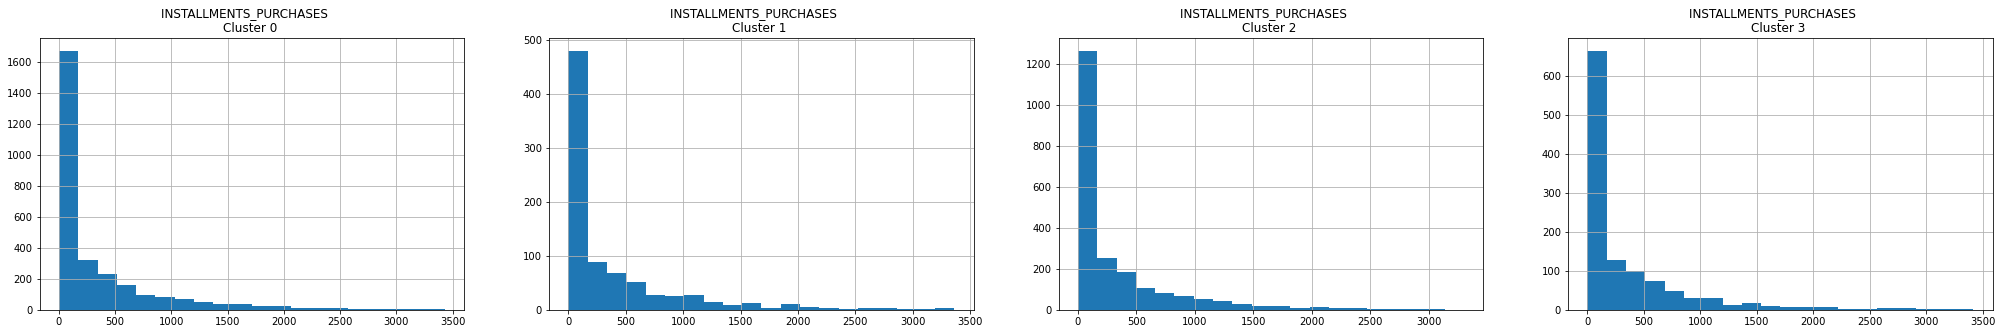

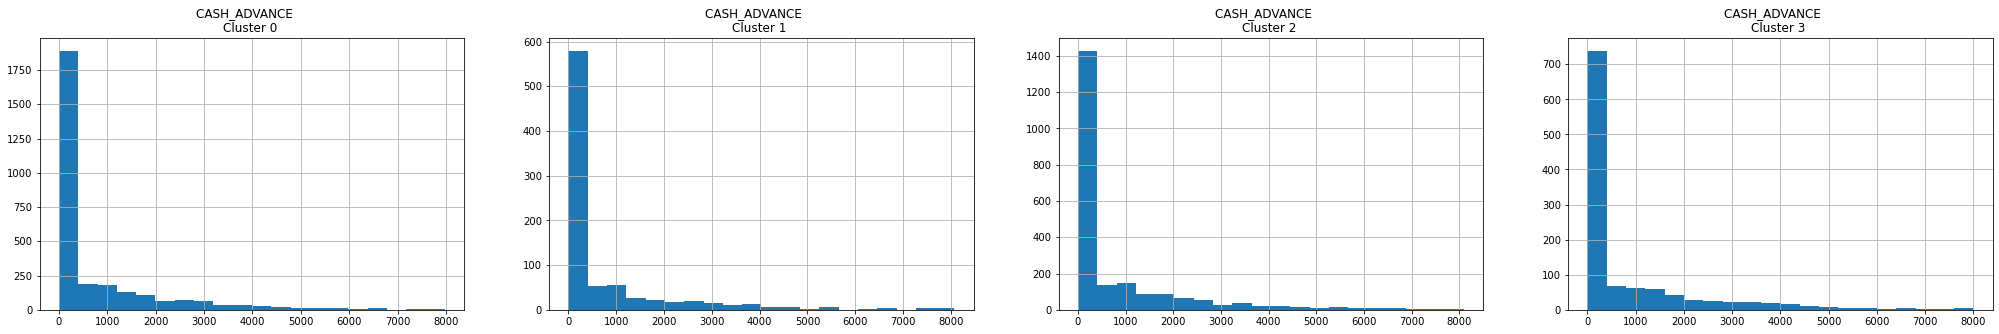

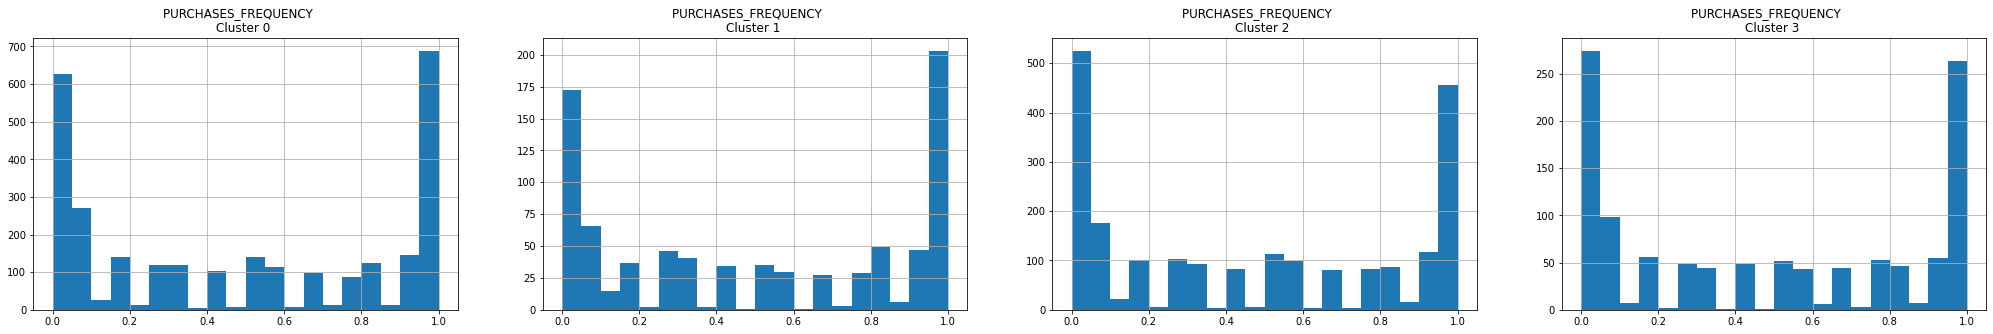

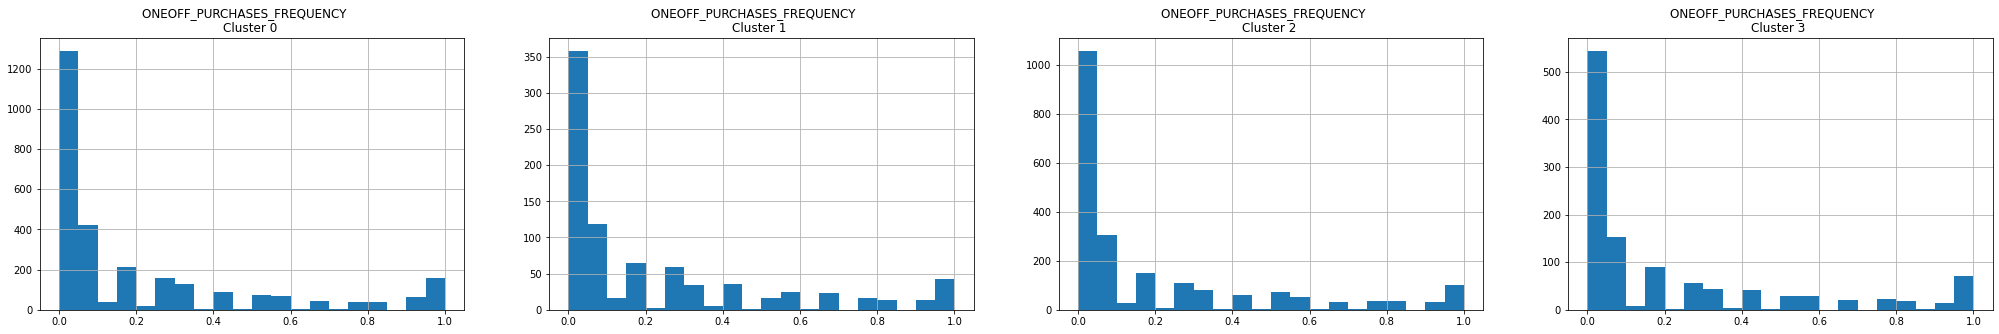

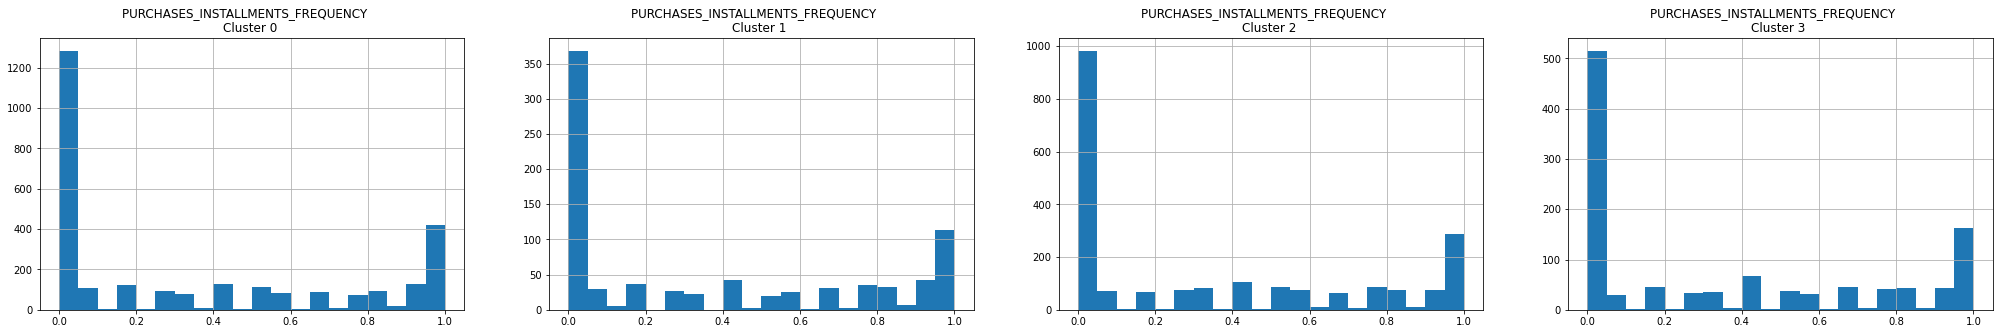

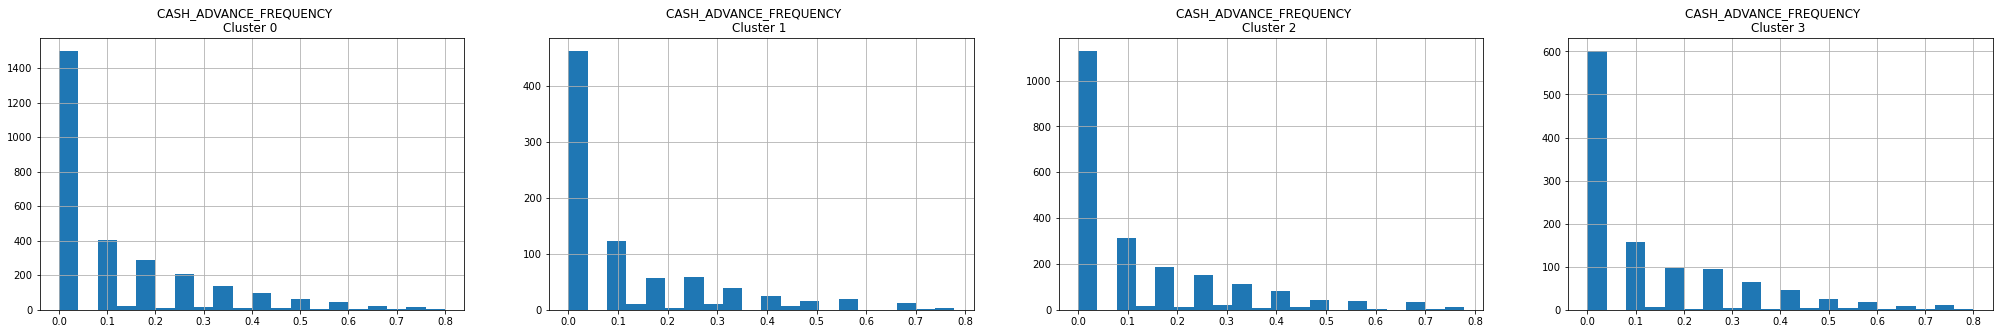

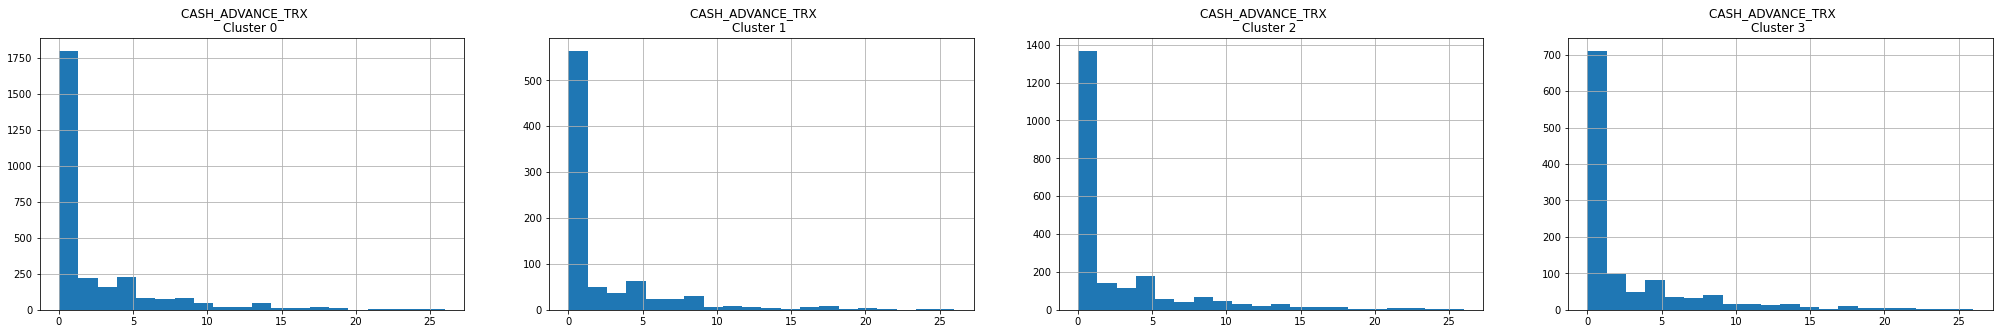

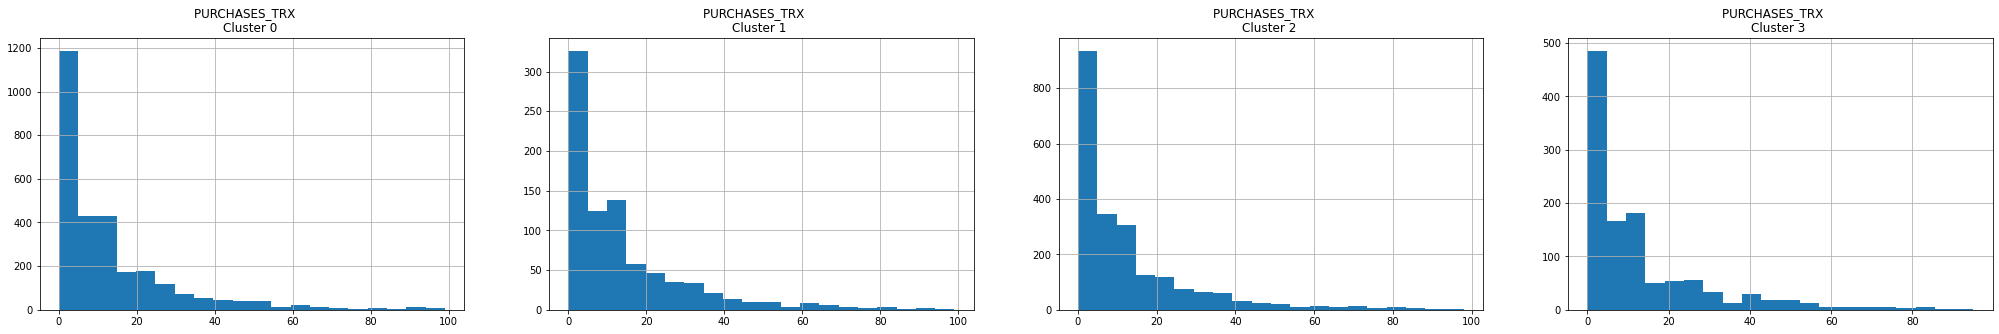

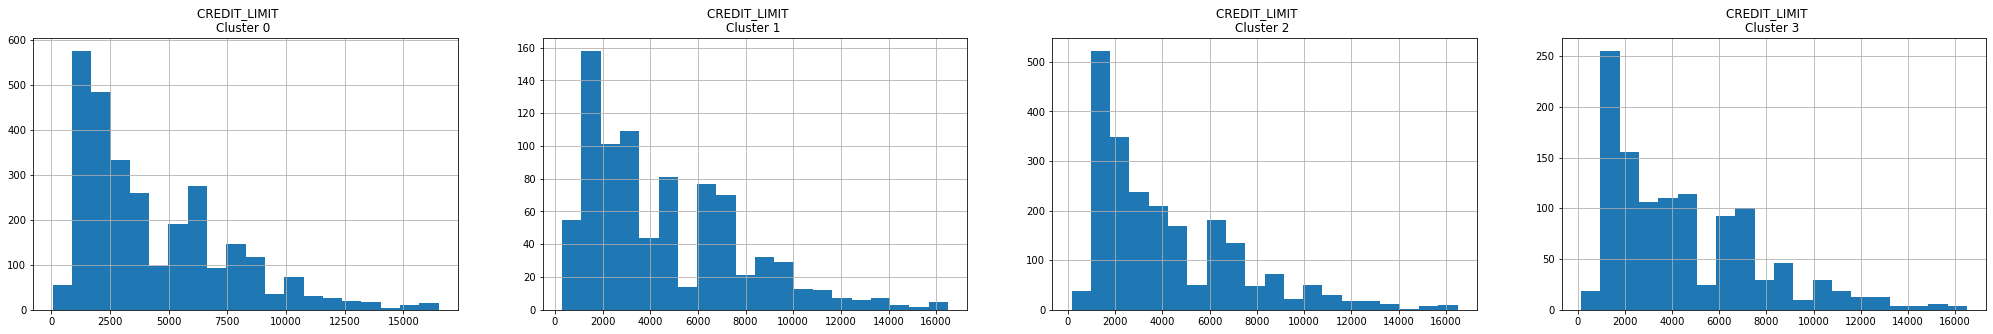

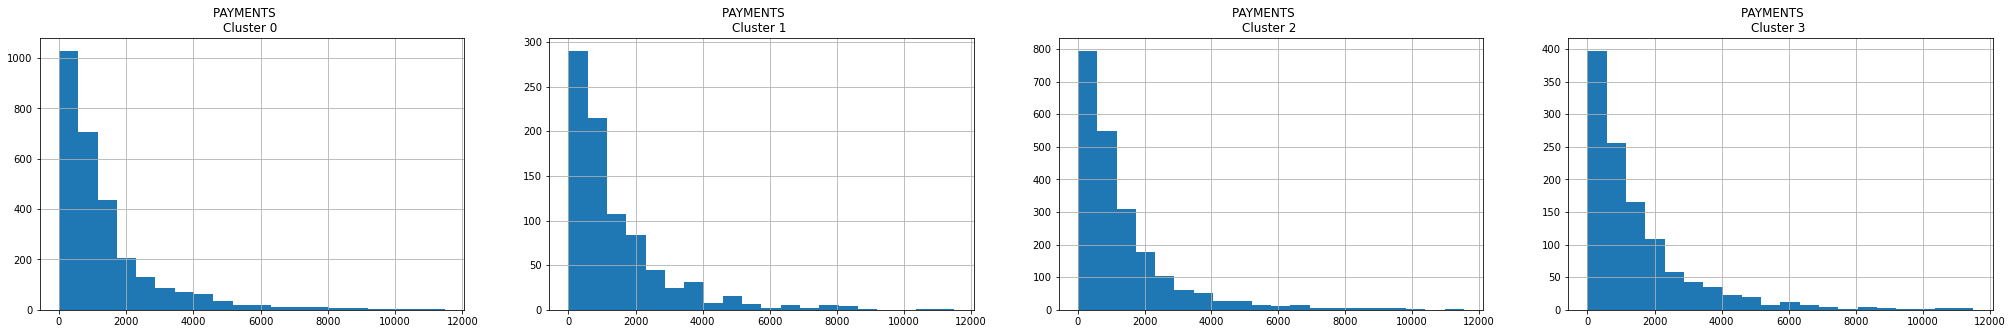

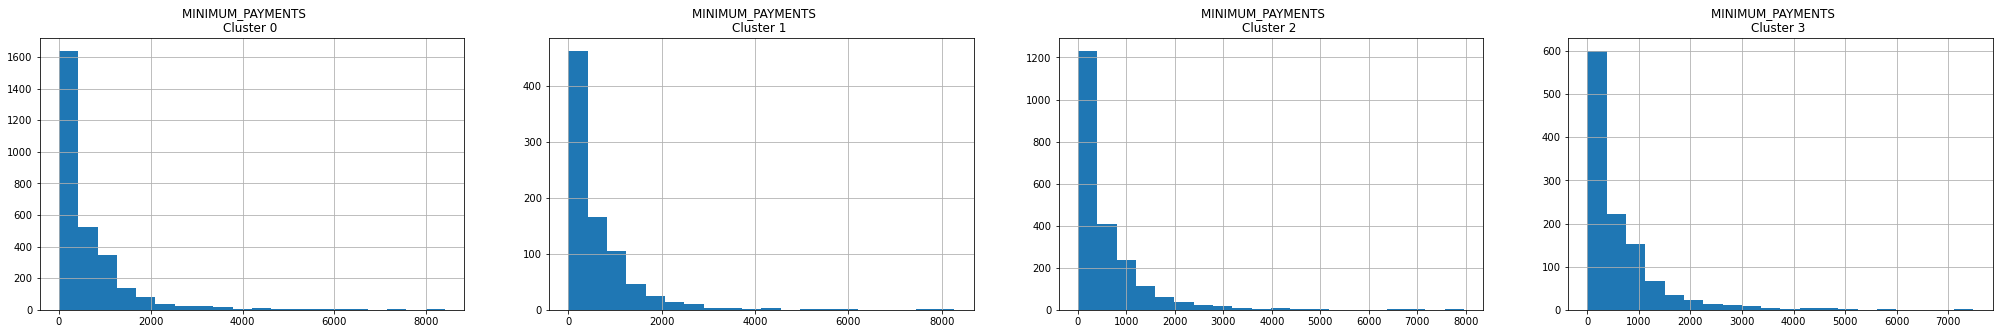

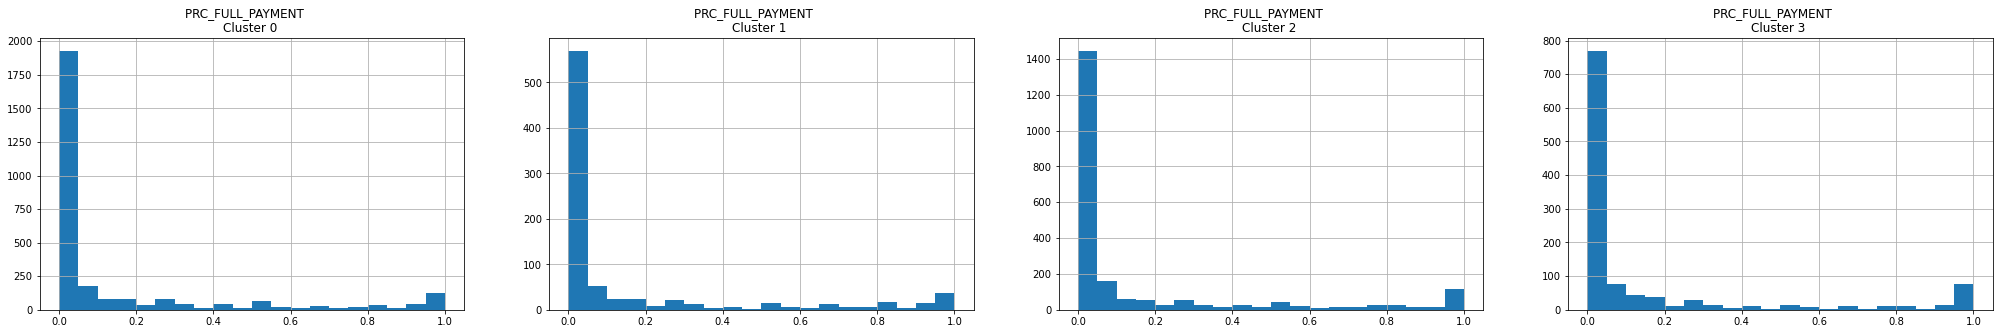

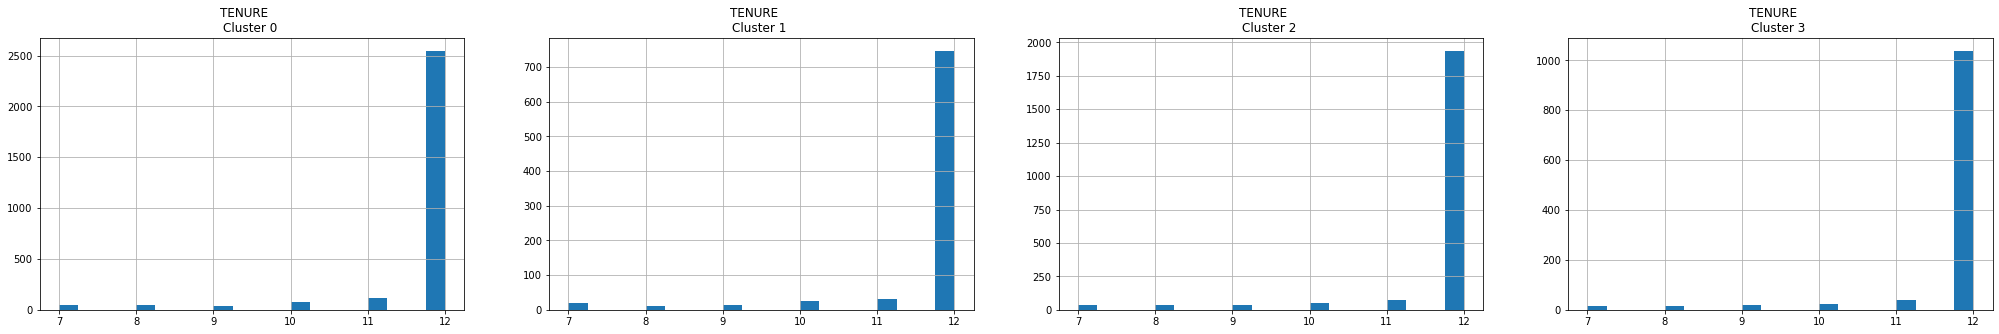

In [36]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


In [83]:
# PCA to  visualise clusters 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.32562355, -2.04663031],
       [-2.7810681 ,  3.31126285],
       [ 1.23742805,  0.54475338],
       ...,
       [-2.57472847, -1.14053811],
       [-0.1166379 , -1.95458744],
       [-2.51578185, -0.87598004]])

In [84]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.325624,-2.046630
1,-2.781068,3.311263
2,1.237428,0.544753
3,-0.606675,-0.007233
4,-1.448064,-1.469048


In [85]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.325624,-2.046630,1
1,-2.781068,3.311263,4
2,1.237428,0.544753,3
3,-0.606675,-0.007233,1
4,-1.448064,-1.469048,1


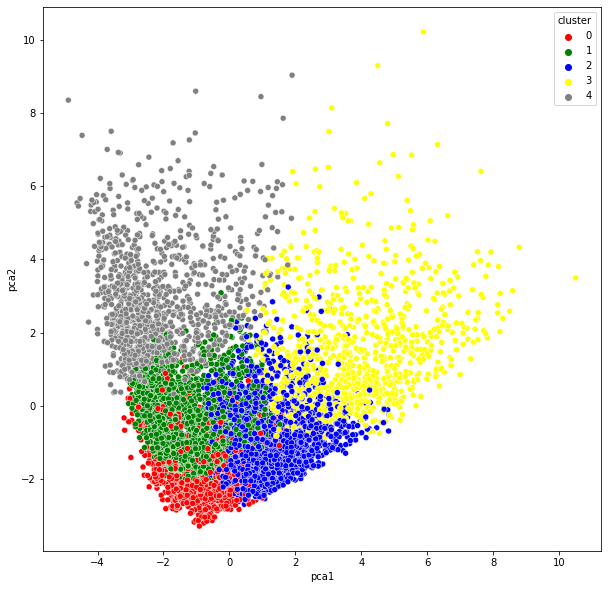

In [88]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow','gray'])
plt.show()

In [89]:
pca.explained_variance_ratio_

array([0.28968147, 0.20361759])

In [90]:
pca.components_

array([[-0.08913738,  0.06780863,  0.37917971,  0.28649516,  0.3191349 ,
        -0.18789276,  0.37906783,  0.27610879,  0.31706451, -0.22835953,
        -0.20630031,  0.38394671,  0.103835  ,  0.12343627, -0.04771062,
         0.17424212,  0.05668172],
       [ 0.42048923,  0.2177493 ,  0.18057787,  0.19119334,  0.06594757,
         0.36837173, -0.00242769,  0.14551375, -0.03449513,  0.35504815,
         0.36147513,  0.13088313,  0.25399288,  0.30256925,  0.29777036,
        -0.15512562,  0.03934953]])